## Introduction to Seaborn: statistical data visualization
<table><border=0><tr><td><img src="http://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/errorband_lineplots_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/scatterplot_sizes_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/timeseries_facets_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/horizontal_boxplot_thumb.png" width="100"></td><td><img src="http://seaborn.pydata.org/_static/regression_marginals_thumb.png" width="100"></td></tr></table>
    

[Seaborn_API_reference](http://seaborn.pydata.org/api.html)
    
In this document we will learn how to create meaningful visualization that helps summarize the large amount of data effectively. We are introducing two libraries; matplotlib and seaborn.

It's common to use `sns` as an alias for seaborn. We will also use the `pyplot` module from the `matplotlib` package, and we will use `plt` as the alias.

Recall the magic function `%matplotlib inline`. This is a special Juypter command that renders and displays the plot in Juypter notebook.

In [ ]:
### Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
### The input file is tab-delimited
tsv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"

# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsv_Filepath, sep='\t')

In [ ]:
### A reminder of what columns are in this dataset and the size of the dataframe (.info())


### Data cleaning
Notice that the fields `Species`, `Kingdom`, `Class`, and `Assembly status` all contain strings, and some of the numeric fields contains "-" instead of a number. Replace the "-" in the numeric field with NaN value. We do this when we read in the tsv file.

In [ ]:
### User dictionary that will be used to cast dtypes to change Species, Kingdom, Class, and Assembly status into string
my_types={
    <column>:<datatype>,
}

### Try reading in dataframe, but change it so that we replace the dtypes and the na_values type
euk=pd.read_csv(tsv_Filepath, sep="\t", dtype= , na_values= )
euk.tail(5)

In [11]:
### Check the datatype of string columns
euk.dtypes

,0
Species,object
Kingdom,object
Class,object
Size (Mb),object
GC%,object
Number of genes,object
Number of proteins,object
Publication year,object
Assembly status,object


In [10]:
### Check .info() again. What do you notice?
euk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Species             8302 non-null   object
 1   Kingdom             8302 non-null   object
 2   Class               8302 non-null   object
 3   Size (Mb)           8302 non-null   object
 4   GC%                 8302 non-null   object
 5   Number of genes     8302 non-null   object
 6   Number of proteins  8302 non-null   object
 7   Publication year    8302 non-null   object
 8   Assembly status     8302 non-null   object
dtypes: object(9)
memory usage: 583.9+ KB


## Visualizing relationship between two variables

Now, let's face the truth. We are not very good at seeing patterns by reading large tables of data. For example, look at the following table that contains the "Size (Mb)" (genome size) and "Number of genes" for reptiles. Can you see the relationship between genome size and the number of genes?

In [ ]:
## Filter for Class and remove outliers (where proteins > 1000)
reptile_protein = euk
reptile_protein = reptile_protein[(euk.Class=="Reptiles") & (euk["Number of proteins"]>1000)]
reptile_protein[["Species", "Size (Mb)", "Number of genes"]]

This is a small dataset, and it's already quite challenging to spot the relationship. Let's try to view this data by creating a scatter plot using seaborn.  

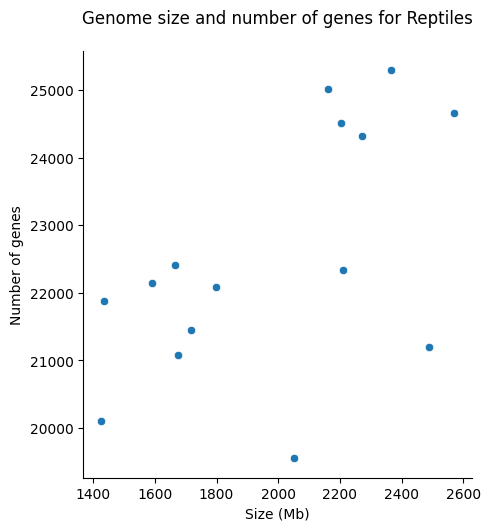

In [ ]:
### Generate a scatter plot (relplot) to quickly look at the relationship between size of genome and number of genes
sns.relplot(data=, x=, y=)

## Use plt.title to give name, pad= to pad the title, and semicolon(;) at end to omit the stdout text of the plot
plt.title()

It only takes a glance to see the positive correlation. In this lecture we will use visualization to make sense of our data.

## `relplot` - Relationship plot
We pass the dataframe into the [`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html) function, and the names of the columns that we want on the `x` and `y` axes.  

Let's look at the relationship between genome size and number of genes in the entire eukaryote genome dataset

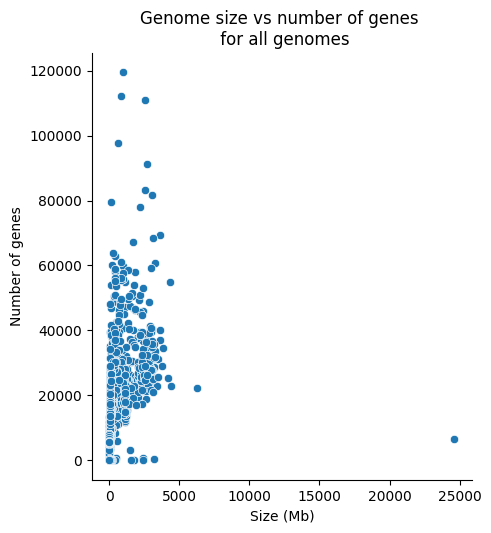

In [ ]:
### Generate a relationship plot of all eukaryote genome
sns.relplot(data=euk, x="Size (Mb)", y="Number of genes")
plt.title("Genome size vs number of genes \n for all genomes");

The chart above shows a problem commonly encountered in real life data: there is a _single outlier_ with a massive genome size, which compresses the rest of the data points over to the left and makes it difficult to see the patterns.

We could fix this by manually setting the x-axis limits (using `plt.xlim(,)`). Another approach is to filter the dataframe and exclude very large genomes.

In [12]:
# Excluding the outlier
# make sure these columns are numeric
num_cols = ["Size (Mb)", "Number of genes", "Number of proteins"]
euk[num_cols] = euk[num_cols].apply(pd.to_numeric, errors="coerce")


sns.relplot(
    data=euk[euk["Size (Mb)"] < 5000],
    x="Size (Mb)",
    y="Number of genes"
)
# plt.xlim(0, 3000)
plt.title("Genome size vs number of genes \n for genome size smaller than 5000 Mb");

TypeError: '<' not supported between instances of 'str' and 'int'

## Adding color using `hue`
Rather than giving `relplot` a collection of x and y values to plot, instead we give it the whole dataframe and then specify which columns we want to determine the x and y positions of each point.

The benefits of this way of thinking about plots become clear when we start mapping other properties. By setting the `hue` argument we can specify which column we want to determine the color of each point. Here is another plot of genome size versus number of genes. We will limit the plot to animals and associated GC percentage represented by _hue_. It is best to remove any rows with missing data before plotting our data so that it will not impact seaborn's ability to choose the color scales for the `hue`. We wil use panda's [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) to do that.

**DNA has 4 building blocks**
`A`, `T`, `C`, and `G`

DNA_seq = "ATCCGTAGTATACGGATCGTAGATTATACGGACGAGTCGACTGACTGACT"

CG% is the proportion of the DNA sequence containing Cs and Gs. Based on CG% of the DNA, we can tell, whether we are looking at the DNA of a particular organism.

In [ ]:
### We will drop the NA values since they do not contribute anything meaningful to the plot
animals = (
    euk[(euk["Kingdom"]=="Animals")].dropna()
)

animals.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
34,Caenorhabditis briggsae,Animals,Roundworms,108.3840,37.6966,22736.0,21959.0,2002,Chromosome
35,Caenorhabditis elegans,Animals,Roundworms,100.2860,35.4317,46857.0,28420.0,2001,Complete Genome
36,Brugia malayi,Animals,Roundworms,93.6591,31.4990,11441.0,11472.0,2002,Scaffold
37,Aedes aegypti,Animals,Insects,1278.7300,38.1667,19339.0,28317.0,2017,Chromosome
38,Aedes albopictus,Animals,Insects,2247.3100,40.3999,38274.0,42912.0,2016,Contig


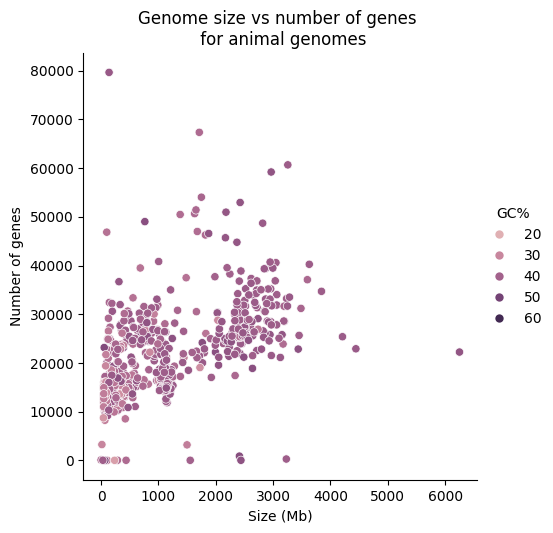

In [ ]:
sns.relplot(
    data = animals,
    x = "Size (Mb)",
    y = "Number of genes",
    hue = "GC%"
)

plt.title("Genome size vs number of genes \n for animal genomes");

You can choose different palette for using different colors by setting the `palette` argument in relplot. [seaborn_color_palettes](http://seaborn.pydata.org/tutorial/color_palettes.html)

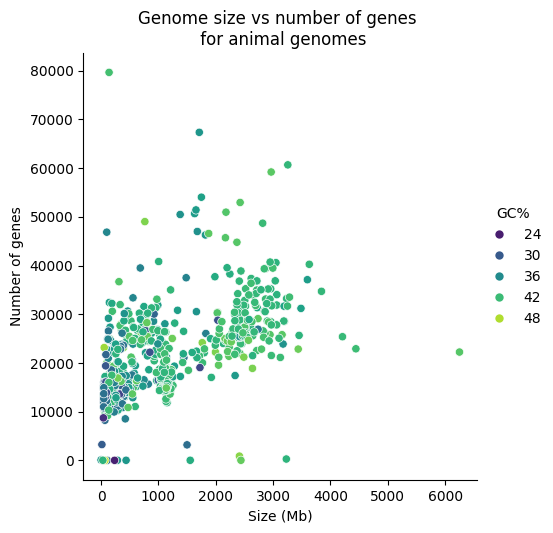

In [ ]:
sns.relplot(
    data=animals,
    x="Size (Mb)",
    y="Number of genes",
    hue="GC%",
    palette="viridis"
)
plt.title("Genome size vs number of genes \n for animal genomes");

## Size of data points
If we pick our mapping carefully, this lets us see multiple relationships between variables in a single plot. Unsurprisingly, larger genomes have more genes, and tend to have more moderate GC percentages - all the extremes of GC percentage (i.e. very light or dark colors) are over to the left of the chart.

Another property that we can map is the genome size of the data points. To plot the number of genes versus the number of proteins and have the *size* of each point becdetermined by the size of the genome we will use the `size` argument. The `size` argument maps the size of the dot to the size of the genome. The argument `sizes` determines the minimum and maximum sizes of the points we want on the plot.

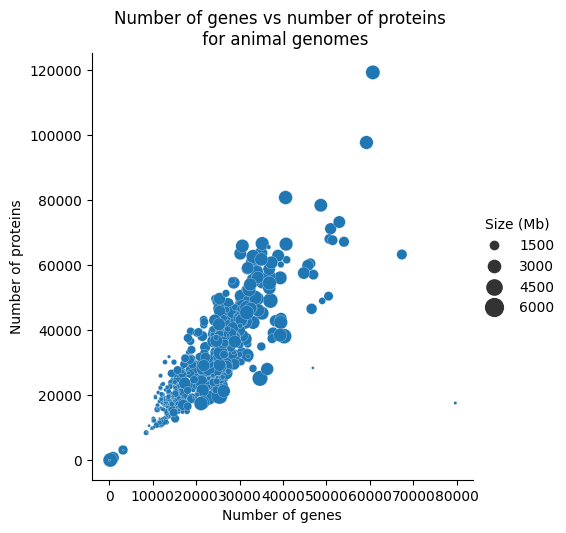

In [ ]:
sns.relplot(
    data=animals,
    x="Number of genes",
    y="Number of proteins",
    size="Size (Mb)",
    sizes=(1, 200)
)

plt.title("Number of genes vs number of proteins \n for animal genomes");

We can combine `size` and `hue` to add more meaning to our visualization. To keep track of the genome size we will use `size` and to keep track of the publication year we will use `hue`.

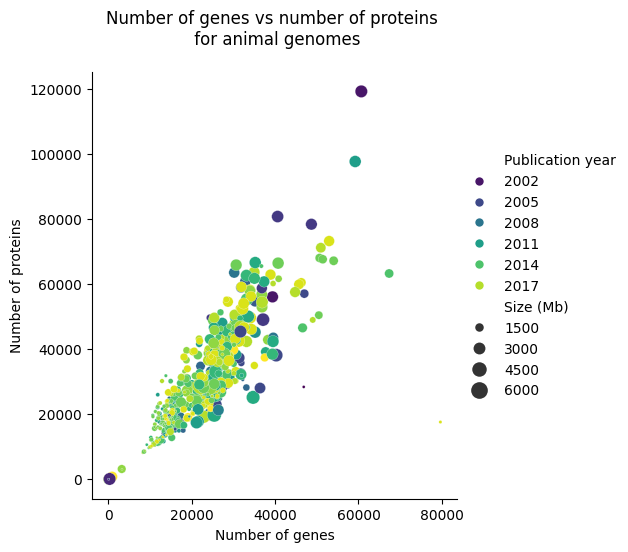

In [ ]:
sns.relplot(
    data=animals,
    x="Number of genes",
    y="Number of proteins",
    size="Size (Mb)",
    sizes=(2, 150),
    hue="Publication year",
    palette="viridis"
)
plt.title("Number of genes vs number of proteins \n for animal genomes", pad=20);

### Drawback to too much data
As we add more details to our plot, it becomes harder to interpret. The relative
importance of the different point properties is determined by the way that our vision works.  

Research has shown that we find it easiest to see patterns in the position of the points (x and y), followed by the _size_ and finally the _hue_. We should take this into account when deciding which variables to map to which properties.

Remember that the starting point for all of these plots is a pandas dataframe. Which means to plot something like gene density, which is not part of the original file, we just need to add it as a new column first.

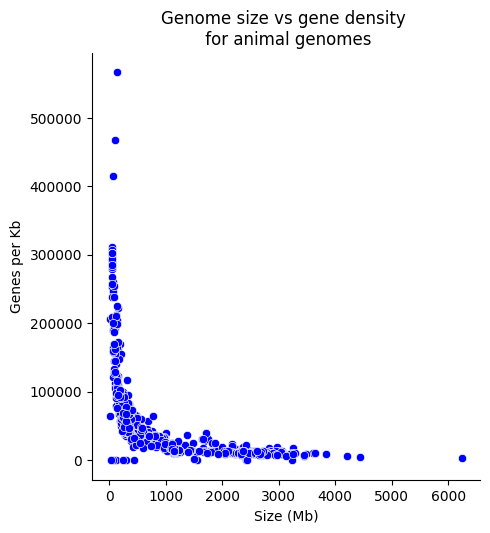

In [ ]:
## Create a new column to calculate gene density
animals["Genes per Kb"] = animals["Number of genes"]/animals["Size (Mb)"]*1000

## Relationship plot
sns.relplot(
    data=animals,
    x="Size (Mb)",
    y="Genes per Kb",
    color="blue",
)
plt.title("Genome size vs gene density \n for animal genomes");


We know from our previous plots that there is a strong positive correlation between genome size and number of genes, but this plot tells us that the pattern is reversed for gene density. Large genomes may contain more genes, but the genes are spaced farther apart!

Although this result is not particularly surprising, it is reassuring to see it in such a clear figure.

## Special types of scatter plots

In this section, we will learn how to plot large number of data points. We will use a dataset that contains genome sequence assembly data.


<table border=0><tr>
<td colspan=2><img src="https://rheonix.com/wp-content/uploads/2018/10/Updated-NGS-Workflow-web.png" width=700></td></tr>
<tr><td><img src="https://contig.files.wordpress.com/2010/02/alignment.jpg" width=400></td><td>
<img src="https://slideplayer.com/slide/12967081/79/images/6/Sequence+assembly+Reads+Contigs+Scaffolds+6.jpg" width=300></td></tr></table>

In [ ]:
# This dataset has no missing data
contigs_filepath="https://raw.githubusercontent.com/csbfx/advpy122-data/master/contigs.csv"

contigs = pd.read_csv(contigs_filepath)
contigs.head()

,name,length,GC,coverage,phylum
0,scaffold1_size1534183,1534183,0.4304,0.603315,Bacteroidetes
1,scaffold2_size1255804,1255804,0.4237,1.266944,Bacteroidetes
2,scaffold3_size1208507,1208507,0.5007,0.364660,Armatimonadetes
3,scaffold4_size1204010,1204010,0.4281,0.499764,Bacteroidetes
4,scaffold5_size1189196,1189196,0.4942,0.320681,Proteobacteria


In [ ]:
# How many rows are in this dataset?
contigs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22497 entries, 0 to 22496
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      22497 non-null  object 
 1   length    22497 non-null  int64  
 2   GC        22497 non-null  float64
 3   coverage  22497 non-null  float64
 4   phylum    22497 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 878.9+ KB


Let’s try to visualize the relationship between `GC` (GC content) and `length` (note that for this dataset the GC is measured as a content, between 0 and 1).

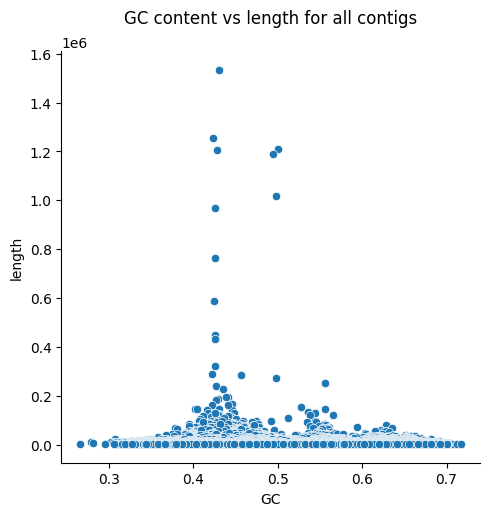

In [ ]:
gc = sns.relplot(data=contigs, x="GC", y="length")
plt.title("GC content vs length for all contigs", pad=20); #pad=20, allow a bit more space for a two-line title

Let's visualize our plot by first filtering out for some outliers (ie., small numbers of very large contigs). We will use pandas to filter these out in order to better see the distribution of the rest of the data.

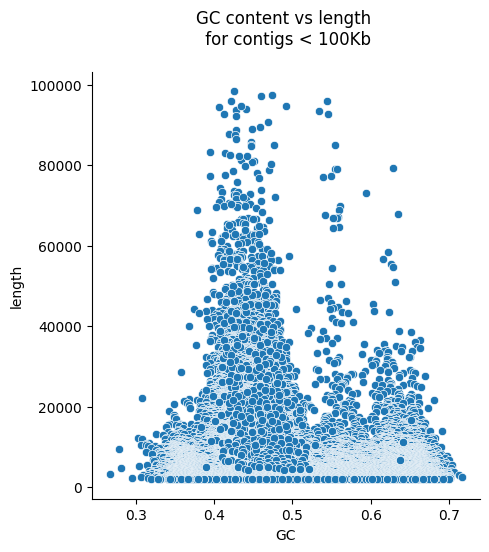

In [ ]:
sns.relplot(
    data=contigs[contigs.length < 100000],
    x="GC",
    y="length"
)
plt.title("GC content vs length \n for contigs < 100Kb", pad=20);

There is clearly some structure in this plot, but the sheer number of points being plotted make it hard to see. There are simply too many points on top of each other.

There are a few ways to cope with this. One option is to set the points to be transparent using the `alpha` argument. Setting `alpha = 0.01` makes the each point on the plot 99% transparent and turns the circles into a fuzzy cloud, and makes it possible to discern some structure that we could not see before.

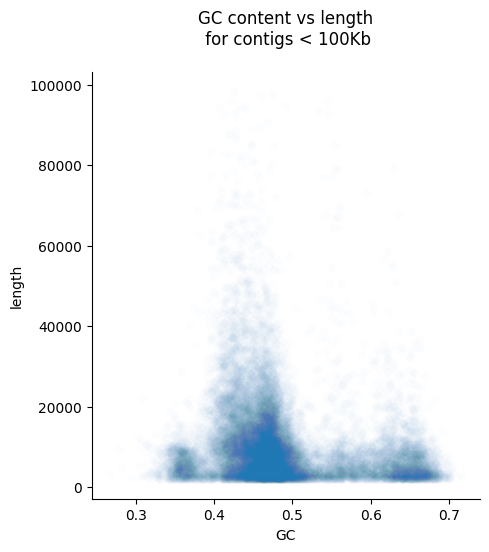

In [ ]:
sns.relplot(
    data=contigs[contigs.length < 100000],
    x="GC",
    y="length",
    alpha=0.01
)
plt.title("GC content vs length\n for contigs < 100Kb", pad=20);

It certainly looks like there are several populations of contigs with different ranges of GC and length.

A similar idea is to shrink the points, which we can do by setting the `s` parameter (`s` is short for size - remember from earlier that the size parameter is used when we want the size of points to vary). We will also have to remove the border around each point by setting its `linewidth` to zero:

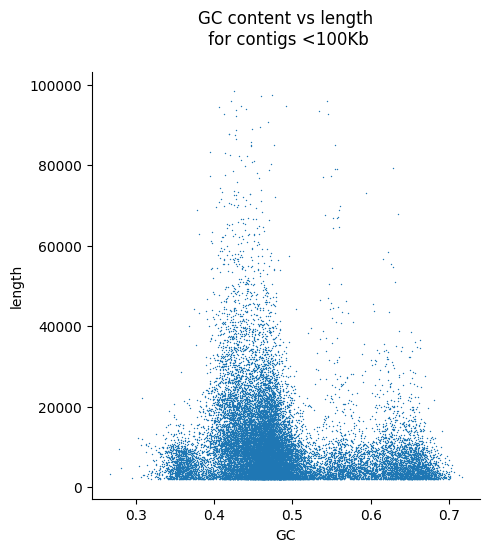

In [ ]:
sns.relplot(
    data=con[con.length < 100000],
    x="GC",
    y="length",
    s=1,
    linewidth=0
)
plt.title("GC content vs length\n for contigs <100Kb", pad=20);

Another option when we have too many points is to plot just a random subset of the dataset. There is no option to do that in seaborn, but luckily it is easy using pandas.

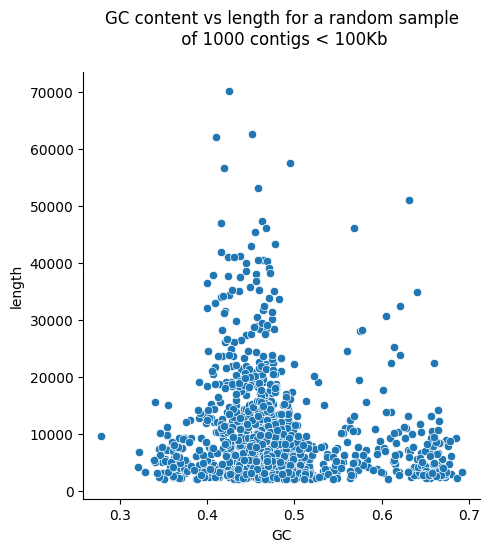

In [ ]:
### Subsample the dataset to select a random subset
sns.relplot(
    data=contigs[contigs.length < 100000].sample(1000),
    x="GC",
    y="length"
)

plt.title(
    "GC content vs length for a random sample\n of 1000 contigs < 100Kb", pad=20
);

## Hexbin
These first three approaches still use scatter plots, where individual data points are drawn. To get away from this, we could imagine dividing up the area of the chart into different regions and shading them based on the number of
points in the area. This gives us a *hexbin* chart. We can draw one in seaborn using`jointplot` with the `kind=hex` argument.

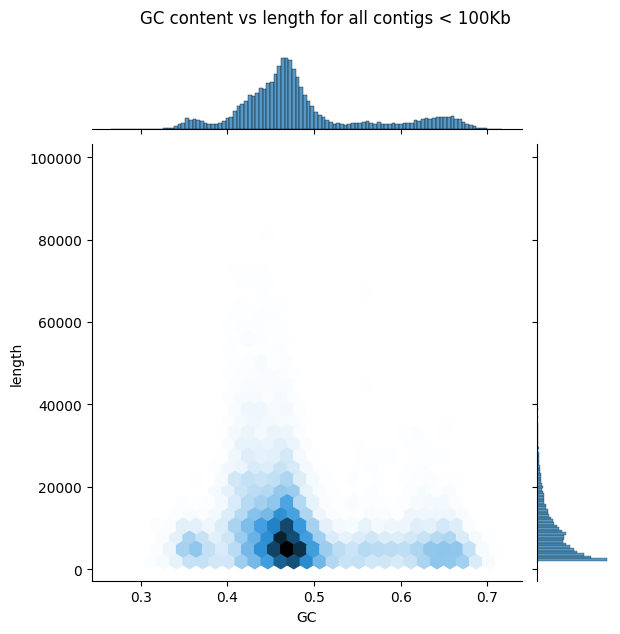

In [ ]:
g = sns.jointplot(
    data=contigs[contigs.length < 100_000],
    x = "GC",
    y = "length",
    kind = "hex",
    gridsize = 30 #how many hexes wide and high
)

### Set a super title for the figure
# Notice how for this plot, our usual approach of using plt.title to set a title doesn’t work
# We will use the fig attribute to get a reference to the figure, then call suptitle to make a supertitle

g.fig.suptitle("GC content vs length for all contigs < 100Kb", y = 1.05); # y = 1.05 is the coordinate
                                                                          # where the title is positioned

This hexbin plot nicely illustrates one of its weaknesses; the outliers with large size effectively disappear from the chart. The reason why is that there are not enough data points in any one hex to raise its density above the background level. This is a fundamental trade off that we see in many types of plots. To visualize large datasets generally means that we need to give up on the ability to see individual points.

Given that we cannot actually see any data above about 40000 on the y-axis, we will focus on the data that we can see by excluding contigs with length greater than 40000.

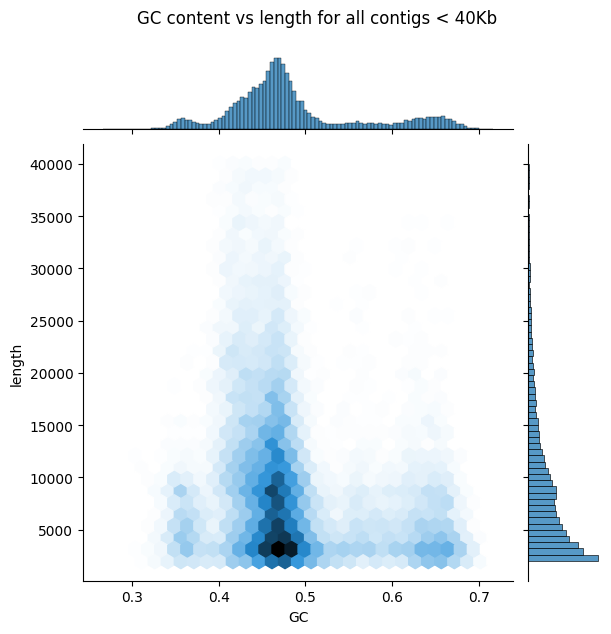

In [ ]:
## Plot contigs less than 40Kb
g = sns.jointplot(
    data = contigs[contigs.length < 40000],
    x = "GC",
    y = "length",
    kind = "hex",
    gridsize = 30
)

# Set a super title for the figure
g.fig.suptitle("GC content vs length for all contigs < 40Kb", y = 1.05);

## `catplot` - Categorical plot
In previous lectures we introduced `value_counts()` as a way to ask "how many?". To visualize these counts we can use seaborn's `catplot`. `catplot` takes in a long-form (tidy) dataframe for plotting. In a tidy dataframe, each column should correspond to a variable, and each row should correspond to an observation. Here we created a tidy dataframe, `animals_df`, that contains the Class name of each observation of an Animal.

In [ ]:
### Use to_frame() to convert a Series to a Dataframe
animals_df = euk.Class[(euk.Kingdom == "Animals")].to_frame()
animals_df.columns = ['Animals']
animals_df

,Animals
34,Roundworms
35,Roundworms
36,Roundworms
37,Insects
38,Insects
...,...
7783,Mammals
7784,Mammals
7789,Mammals
7790,Mammals


There are many kinds of catplot. Here we are setting `x = 'Animals'` and `kind = 'count'` because we are plotting barplot that represents the counts of each unique observation (ie., counts of each unique types of Animals).

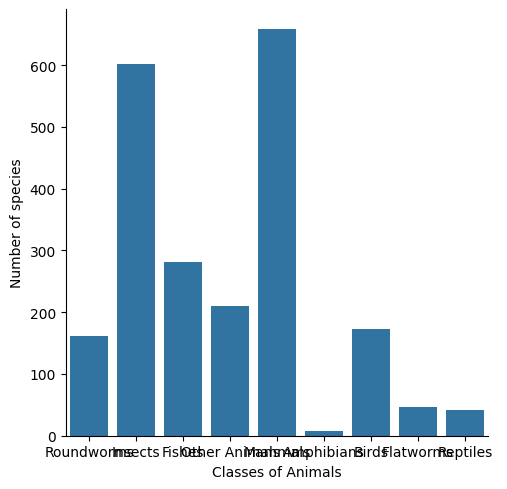

In [ ]:
sns.catplot(
    x = 'Animals',
    data = animals_df,
    kind = 'count'
).set_axis_labels('Classes of Animals', 'Number of species');

We can improve the plot by ordering the bars based on the height, and also swap the x and y axis to avoid having overlapping data along the x-axis. We don't really need different colors for each bar in this plot since the bars are already labeled. We will set the `color` to 'darkblue'.

In [ ]:
animals_df['Animals'].value_counts()

,count
Animals,
Mammals,658
Insects,602
Fishes,282
Other Animals,210
Birds,172
Roundworms,162
Flatworms,47
Reptiles,41
Amphibians,7


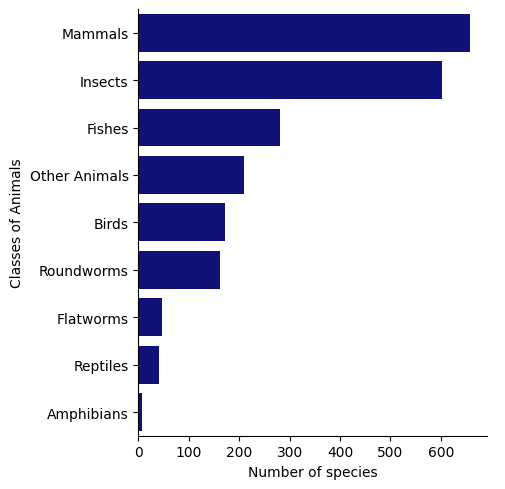

In [ ]:
sns.catplot(
    y = "Animals",
    data = animals_df,
    kind = 'count',
    order = animals_df['Animals'].value_counts().index,
    color = 'darkblue'
).set_axis_labels('Number of species', 'Classes of Animals');

Let's take a closer look at the `order` argument. We use `value_counts()` to get the counts of each unique Animals. The resulting Series output by `value_counts()` is already sorted. Simply add `.index` to get the index of each Class of Animals in the sorted order.

In [ ]:
animals_df['Animals'].value_counts().index

Index(['Mammals', 'Insects', 'Fishes', 'Other Animals', 'Birds', 'Roundworms',
       'Flatworms', 'Reptiles', 'Amphibians'],
      dtype='string', name='Animals')

## Rotating the x-axis labels
Another way to display the axis labels is to rotate them so that they don't overlap with each other using `set_xticklabels`.

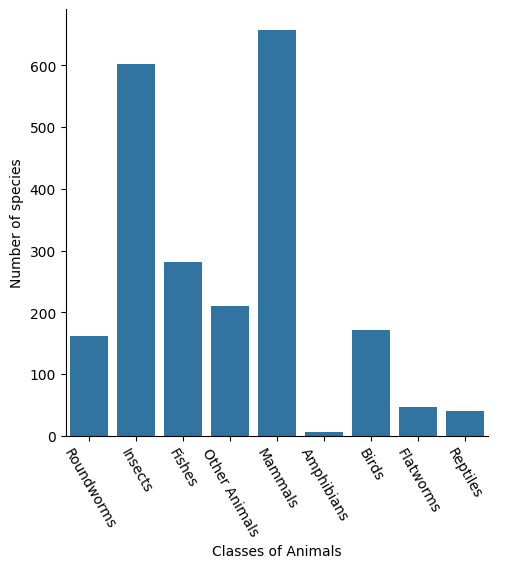

In [ ]:
g = sns.catplot(
    x = 'Animals',
    data = animals_df,
    kind = 'count'
)
g.set_axis_labels('Classes of Animals', 'Number of species')

## Rotate x-axis label
g.set_xticklabels(rotation=300);

# Class exercise

## **Class Exercise CL8.1**
To visualize trends in genome sequencing over time across eukaryotic classes, we will compute Average genome size (`Size (Mb)`) per `Class` by `Publication year`. Use relplot(kind="line") to show how average genome size  has changed over time for each class. Include a meaninful title in the plot. After creating the plot, insert a markdown cell to describe the relationship between genome size and class over time in this dataset.

&nbsp;  
**Here is your answer for CL8.1**

## **Class Exercise CL8.2**
To visualize and identify clusters of species with similar genome-to-protein size relationships and where the data is most dense, use a hexbin plot using `jointplot(kind="hex")` function. Plot `Size (Mb)` on the x-axis and `Number of protein` on the y-axis. You can choose the gridsize. Include a title for the plot. After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Size (Mb)` and `Number of protein`, what else does this plot show?

&nbsp;  
**Here is your answer for CL8.2**

## **Class Exercise CL8.3**
To compare genome compositional differences (GC%) among eukaryote classes, create a categorical plot using `catplot(kind="box")` to show GC% distributions across different classes.

&nbsp;  
**Here is your answer for CL8.3**

## **Class Exercise CL8.4**
To compare across kingdoms side-by-side, use a multi-panel grid. Use `relplot(kind="scatter", col="Kingdom", hue="Class")` to produce multiple scatter plots of genome size versus `Number of genes` separated by `Kingdom`.

** To create a multi-panel grid, use the `col` and `row` parameters, which assign categorical variables to the columns and rows of the grid, respectively.

&nbsp;  
**Here is your answer for CL8.4**